# Computer Vision: Assignment 3 Part 1 - Some CNN Basics [50%]

Spring 2022 semester.

Due date: **July 1st 2022.**

## Introduction

This question is an introduction to using PyTorch for training simple neural net models. 

Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

Perform this assignment in PyTorch, modifying the baseline code, producing outputs and adding required explanations - *all within this ipython notebook*.

Finally, submit this iPython notebook, including outputs, as an .ipynb file. 

## Question (1): Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

**a)**  Use `matplotlib` and ipython notebook's visualization capabilities to display the average train and average test image of each class, for each of the two datasets.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

## Question (2): Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The cross-entropy loss function computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given target.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

**a)** Add code to plot out the network weights as images (one for each class, of size 28 by 28) after the last epoch. (Hint thread: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) )

**b)** Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Question (3): Training a Multi-Layer Network on MNIST [10%]

**a)**  Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class].

**b)**   Now retrain the model for 10 epochs with each of the learning rates in the set {0.01, 0.1, 1, 10} and test the resulting model. Create a figure and plot the loss curves of each of the four runs for comparison. Explain the obtained (train and test) results.

## Question (4): Training a Convolutional Network on CIFAR [15%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, stride 2, 16 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

**a)** Train it for 20 epochs on CIFAR-10 and plot the training loss curve (avg. loss per epoch) and final test loss and accuracy, when training with or without the two 3x3 convolutional layers. 

**b)**  Give a breakdown of the number of parameters (per layer) within the above model, as well as the overall number.

# **Answer (1):**
create needed blocks of code (and results) below

In [1]:
# imports
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torchvision.models as models

import torchvision
import matplotlib.pyplot as plt
import numpy as np
import visdom

In [2]:
def imshow(img1, img2, dataset, label):
    img1 = img1 / 2 + 0.5  # un-normalize
    img2 = img2 / 2 + 0.5
    np_img1, np_img2 = img1.numpy(), img2.numpy()

    plt.figure()
    plt.suptitle(dataset + " dataset average: Class " + label)
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(np_img1, (1, 2, 0)))
    plt.title('Train')
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(np_img2, (1, 2, 0)))
    plt.title('Test')
    plt.show()

In [3]:
def show_average_images(train_loader, test_loader, dataset, labels):
    
    train_counters, test_counters = [], []
    train_results, test_results = [], []
    
    for _ in range(len(labels)):
        train_counters.append(0)
        test_counters.append(0)
        train_results.append(None)
        test_results.append(None)
    
    dataiter = iter(train_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    train_counters[ind] += 1
                    if train_results[ind] is None:
                        train_results[ind] = img_temp
                    else:
                        train_results[ind] += img_temp

        except StopIteration:
            break

    dataiter = iter(test_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    test_counters[ind] += 1
                    if test_results[ind] is None:
                        test_results[ind] = img_temp
                    else:
                        test_results[ind] += img_temp

        except StopIteration:
            break
        
    for index, label in enumerate(labels):
        
        test_results[index] /= test_counters[index]
        train_results[index] /= train_counters[index]

        imshow(torchvision.utils.make_grid(train_results[index]), torchvision.utils.make_grid(test_results[index]), 
               dataset, labels[index])

Files already downloaded and verified
Files already downloaded and verified


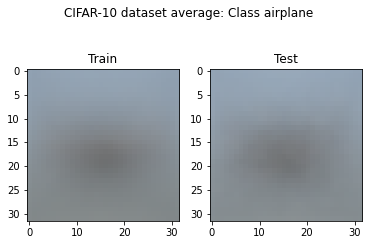

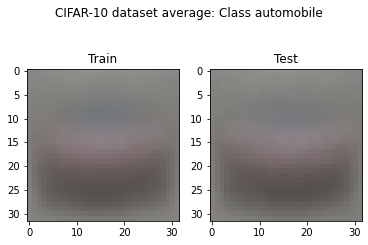

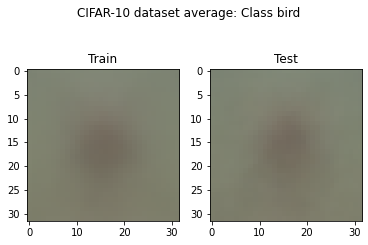

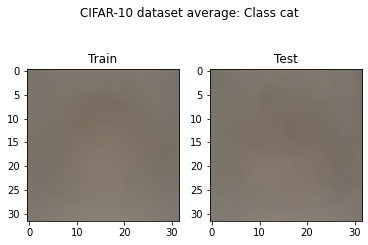

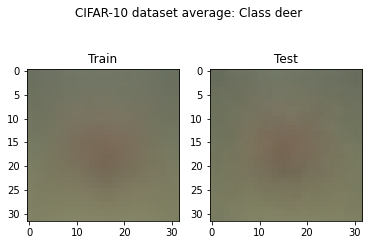

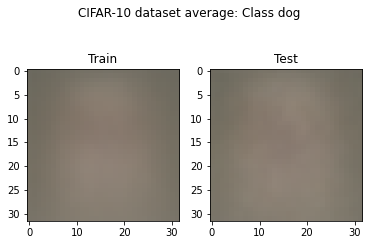

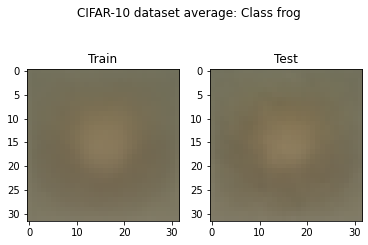

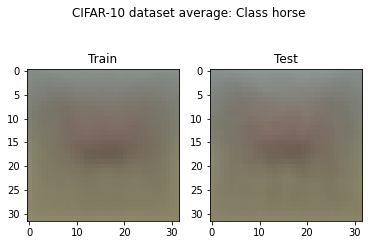

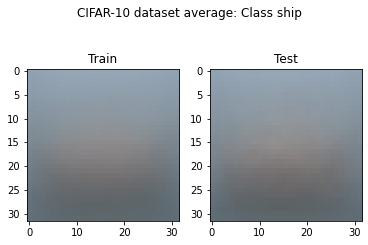

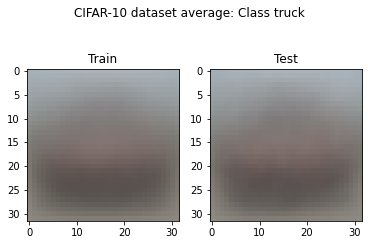

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


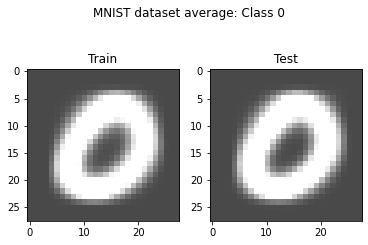

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


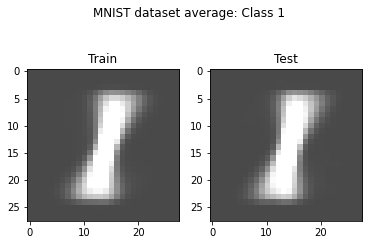

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


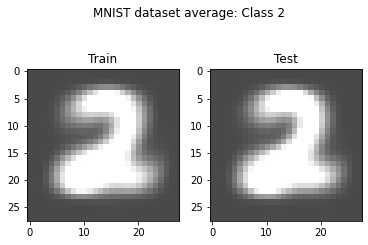

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


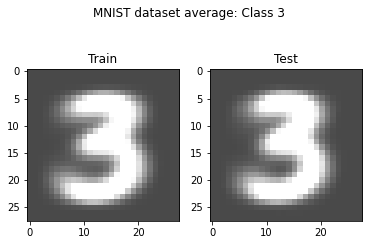

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


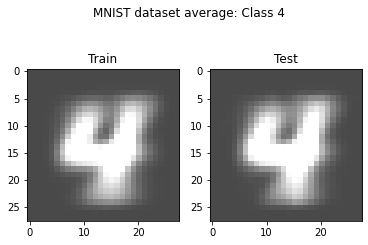

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


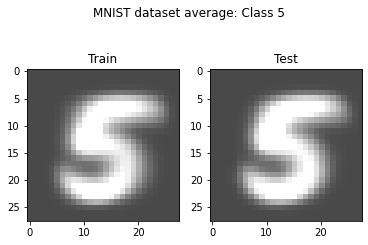

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


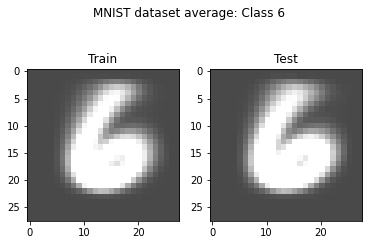

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


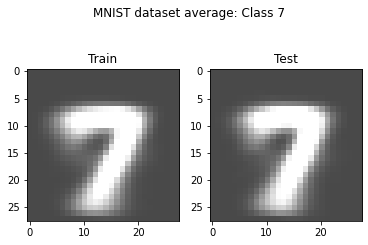

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


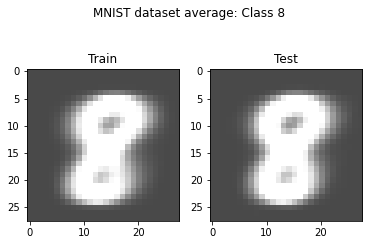

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


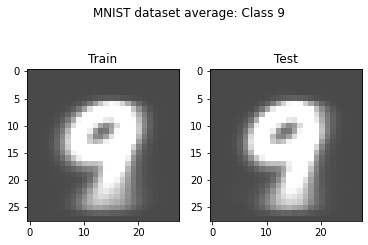

In [4]:
torch.utils.data.DataLoader.num_worker = 0

cifar_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

mnist_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])

cifar_train = torchvision.datasets.CIFAR10(root='.', train=True,
                                           download=True, transform=cifar_transform)

cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

cifar_test = torchvision.datasets.CIFAR10(root='.', train=False,
                                          download=True, transform=cifar_transform)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=1,
                                                shuffle=False, num_workers=2)

mnist_train = torchvision.datasets.MNIST(root='.', train=True,
                                         download=True, transform=mnist_transform)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

mnist_test = torchvision.datasets.MNIST(root='.', train=False,
                                        download=True, transform=mnist_transform)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1,
                                                shuffle=False, num_workers=2)

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

show_average_images(cifar_train_loader, cifar_test_loader, 'CIFAR-10', cifar_labels)
show_average_images(mnist_train_loader, mnist_test_loader, 'MNIST', mnist_labels)

# **Answer (2):**
create needed blocks of code (and results) below

In [5]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [6]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [7]:
# train and test functions
def train(epoch, train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [8]:
# Training and testing 
for i in range(1, epochs+1):
  train(i, mnist_train_loader)

# resetting the value of batch size in the DataLoader objects
cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

test(mnist_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.252973
Train Epoch: 1 [100/60000 (0%)]	Loss: 3.207012
Train Epoch: 1 [200/60000 (0%)]	Loss: 0.000055
Train Epoch: 1 [300/60000 (0%)]	Loss: 0.430259
Train Epoch: 1 [400/60000 (1%)]	Loss: 0.004256
Train Epoch: 1 [500/60000 (1%)]	Loss: 0.013820
Train Epoch: 1 [600/60000 (1%)]	Loss: 0.000058
Train Epoch: 1 [700/60000 (1%)]	Loss: 0.000088
Train Epoch: 1 [800/60000 (1%)]	Loss: 0.000013
Train Epoch: 1 [900/60000 (2%)]	Loss: 2.334479
Train Epoch: 1 [1000/60000 (2%)]	Loss: 1.011448
Train Epoch: 1 [1100/60000 (2%)]	Loss: 0.874211
Train Epoch: 1 [1200/60000 (2%)]	Loss: 0.000109
Train Epoch: 1 [1300/60000 (2%)]	Loss: 0.001103
Train Epoch: 1 [1400/60000 (2%)]	Loss: 0.001432
Train Epoch: 1 [1500/60000 (2%)]	Loss: 0.001522
Train Epoch: 1 [1600/60000 (3%)]	Loss: 4.821583
Train Epoch: 1 [1700/60000 (3%)]	Loss: 0.074059
Train Epoch: 1 [1800/60000 (3%)]	Loss: 0.000000
Train Epoch: 1 [1900/60000 (3%)]	Loss: 0.000051
Train Epoch: 1 [2000/60000 (3%)]	Loss: 0.000217
Trai

Train Epoch: 1 [17100/60000 (28%)]	Loss: 0.000000
Train Epoch: 1 [17200/60000 (29%)]	Loss: 0.005470
Train Epoch: 1 [17300/60000 (29%)]	Loss: 0.014947
Train Epoch: 1 [17400/60000 (29%)]	Loss: 0.000002
Train Epoch: 1 [17500/60000 (29%)]	Loss: 0.000000
Train Epoch: 1 [17600/60000 (29%)]	Loss: 0.000000
Train Epoch: 1 [17700/60000 (30%)]	Loss: 0.012685
Train Epoch: 1 [17800/60000 (30%)]	Loss: 0.000053
Train Epoch: 1 [17900/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.026420
Train Epoch: 1 [18100/60000 (30%)]	Loss: 0.000001
Train Epoch: 1 [18200/60000 (30%)]	Loss: 0.000007
Train Epoch: 1 [18300/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [18400/60000 (31%)]	Loss: 0.020863
Train Epoch: 1 [18500/60000 (31%)]	Loss: 5.412791
Train Epoch: 1 [18600/60000 (31%)]	Loss: 0.224622
Train Epoch: 1 [18700/60000 (31%)]	Loss: 0.033206
Train Epoch: 1 [18800/60000 (31%)]	Loss: 0.000000
Train Epoch: 1 [18900/60000 (32%)]	Loss: 0.044383
Train Epoch: 1 [19000/60000 (32%)]	Loss: 0.000763


Train Epoch: 1 [33900/60000 (56%)]	Loss: 0.015543
Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.000000
Train Epoch: 1 [34100/60000 (57%)]	Loss: 0.027959
Train Epoch: 1 [34200/60000 (57%)]	Loss: 0.000013
Train Epoch: 1 [34300/60000 (57%)]	Loss: 0.000582
Train Epoch: 1 [34400/60000 (57%)]	Loss: 6.842686
Train Epoch: 1 [34500/60000 (58%)]	Loss: 0.000056
Train Epoch: 1 [34600/60000 (58%)]	Loss: 0.000958
Train Epoch: 1 [34700/60000 (58%)]	Loss: 0.068464
Train Epoch: 1 [34800/60000 (58%)]	Loss: 0.002070
Train Epoch: 1 [34900/60000 (58%)]	Loss: 0.000135
Train Epoch: 1 [35000/60000 (58%)]	Loss: 0.000174
Train Epoch: 1 [35100/60000 (58%)]	Loss: 0.001222
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.016618
Train Epoch: 1 [35300/60000 (59%)]	Loss: 0.000002
Train Epoch: 1 [35400/60000 (59%)]	Loss: 0.000000
Train Epoch: 1 [35500/60000 (59%)]	Loss: 0.004469
Train Epoch: 1 [35600/60000 (59%)]	Loss: 0.003274
Train Epoch: 1 [35700/60000 (60%)]	Loss: 0.600547
Train Epoch: 1 [35800/60000 (60%)]	Loss: 3.055383


Train Epoch: 1 [50700/60000 (84%)]	Loss: 0.016950
Train Epoch: 1 [50800/60000 (85%)]	Loss: 12.472131
Train Epoch: 1 [50900/60000 (85%)]	Loss: 0.000059
Train Epoch: 1 [51000/60000 (85%)]	Loss: 0.000000
Train Epoch: 1 [51100/60000 (85%)]	Loss: 0.000038
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.001826
Train Epoch: 1 [51300/60000 (86%)]	Loss: 0.001575
Train Epoch: 1 [51400/60000 (86%)]	Loss: 0.000492
Train Epoch: 1 [51500/60000 (86%)]	Loss: 0.000011
Train Epoch: 1 [51600/60000 (86%)]	Loss: 0.026962
Train Epoch: 1 [51700/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51800/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51900/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [52000/60000 (87%)]	Loss: 0.000156
Train Epoch: 1 [52100/60000 (87%)]	Loss: 0.000001
Train Epoch: 1 [52200/60000 (87%)]	Loss: 0.000001
Train Epoch: 1 [52300/60000 (87%)]	Loss: 0.000000
Train Epoch: 1 [52400/60000 (87%)]	Loss: 1.441554
Train Epoch: 1 [52500/60000 (88%)]	Loss: 0.000320
Train Epoch: 1 [52600/60000 (88%)]	Loss: 0.000000

Train Epoch: 2 [7500/60000 (12%)]	Loss: 0.000000
Train Epoch: 2 [7600/60000 (13%)]	Loss: 0.662950
Train Epoch: 2 [7700/60000 (13%)]	Loss: 0.000018
Train Epoch: 2 [7800/60000 (13%)]	Loss: 0.000019
Train Epoch: 2 [7900/60000 (13%)]	Loss: 0.000013
Train Epoch: 2 [8000/60000 (13%)]	Loss: 0.000467
Train Epoch: 2 [8100/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8200/60000 (14%)]	Loss: 0.000001
Train Epoch: 2 [8300/60000 (14%)]	Loss: 0.071796
Train Epoch: 2 [8400/60000 (14%)]	Loss: 0.000003
Train Epoch: 2 [8500/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8600/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8700/60000 (14%)]	Loss: 0.000002
Train Epoch: 2 [8800/60000 (15%)]	Loss: 0.000004
Train Epoch: 2 [8900/60000 (15%)]	Loss: 0.000001
Train Epoch: 2 [9000/60000 (15%)]	Loss: 0.000000
Train Epoch: 2 [9100/60000 (15%)]	Loss: 2.702240
Train Epoch: 2 [9200/60000 (15%)]	Loss: 0.292834
Train Epoch: 2 [9300/60000 (16%)]	Loss: 0.000032
Train Epoch: 2 [9400/60000 (16%)]	Loss: 0.000098
Train Epoch: 2 [9500

Train Epoch: 2 [24400/60000 (41%)]	Loss: 0.000000
Train Epoch: 2 [24500/60000 (41%)]	Loss: 0.000213
Train Epoch: 2 [24600/60000 (41%)]	Loss: 0.083213
Train Epoch: 2 [24700/60000 (41%)]	Loss: 0.000000
Train Epoch: 2 [24800/60000 (41%)]	Loss: 0.000002
Train Epoch: 2 [24900/60000 (42%)]	Loss: 0.105477
Train Epoch: 2 [25000/60000 (42%)]	Loss: 0.000000
Train Epoch: 2 [25100/60000 (42%)]	Loss: 27.989321
Train Epoch: 2 [25200/60000 (42%)]	Loss: 0.000000
Train Epoch: 2 [25300/60000 (42%)]	Loss: 0.000608
Train Epoch: 2 [25400/60000 (42%)]	Loss: 0.014047
Train Epoch: 2 [25500/60000 (42%)]	Loss: 0.000000
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.000000
Train Epoch: 2 [25700/60000 (43%)]	Loss: 0.058867
Train Epoch: 2 [25800/60000 (43%)]	Loss: 0.000000
Train Epoch: 2 [25900/60000 (43%)]	Loss: 0.000000
Train Epoch: 2 [26000/60000 (43%)]	Loss: 0.000234
Train Epoch: 2 [26100/60000 (44%)]	Loss: 0.000117
Train Epoch: 2 [26200/60000 (44%)]	Loss: 0.000078
Train Epoch: 2 [26300/60000 (44%)]	Loss: 0.002418

Train Epoch: 2 [40800/60000 (68%)]	Loss: 0.071737
Train Epoch: 2 [40900/60000 (68%)]	Loss: 0.000256
Train Epoch: 2 [41000/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [41100/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [41200/60000 (69%)]	Loss: 0.000000
Train Epoch: 2 [41300/60000 (69%)]	Loss: 0.001362
Train Epoch: 2 [41400/60000 (69%)]	Loss: 0.003145
Train Epoch: 2 [41500/60000 (69%)]	Loss: 0.000000
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.051882
Train Epoch: 2 [41700/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [41800/60000 (70%)]	Loss: 0.000012
Train Epoch: 2 [41900/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.000004
Train Epoch: 2 [42100/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [42200/60000 (70%)]	Loss: 0.000002
Train Epoch: 2 [42300/60000 (70%)]	Loss: 0.000005
Train Epoch: 2 [42400/60000 (71%)]	Loss: 0.001276
Train Epoch: 2 [42500/60000 (71%)]	Loss: 0.000000
Train Epoch: 2 [42600/60000 (71%)]	Loss: 0.000078
Train Epoch: 2 [42700/60000 (71%)]	Loss: 0.000012


Train Epoch: 2 [57400/60000 (96%)]	Loss: 0.000503
Train Epoch: 2 [57500/60000 (96%)]	Loss: 0.291727
Train Epoch: 2 [57600/60000 (96%)]	Loss: 1.767125
Train Epoch: 2 [57700/60000 (96%)]	Loss: 2.150981
Train Epoch: 2 [57800/60000 (96%)]	Loss: 1.177663
Train Epoch: 2 [57900/60000 (96%)]	Loss: 0.000005
Train Epoch: 2 [58000/60000 (97%)]	Loss: 0.000001
Train Epoch: 2 [58100/60000 (97%)]	Loss: 0.004246
Train Epoch: 2 [58200/60000 (97%)]	Loss: 0.071493
Train Epoch: 2 [58300/60000 (97%)]	Loss: 0.000000
Train Epoch: 2 [58400/60000 (97%)]	Loss: 0.000001
Train Epoch: 2 [58500/60000 (98%)]	Loss: 0.000095
Train Epoch: 2 [58600/60000 (98%)]	Loss: 0.313738
Train Epoch: 2 [58700/60000 (98%)]	Loss: 0.145594
Train Epoch: 2 [58800/60000 (98%)]	Loss: 0.000072
Train Epoch: 2 [58900/60000 (98%)]	Loss: 0.000004
Train Epoch: 2 [59000/60000 (98%)]	Loss: 0.002484
Train Epoch: 2 [59100/60000 (98%)]	Loss: 0.000004
Train Epoch: 2 [59200/60000 (99%)]	Loss: 2.353101
Train Epoch: 2 [59300/60000 (99%)]	Loss: 0.001395


Train Epoch: 3 [14500/60000 (24%)]	Loss: 0.000018
Train Epoch: 3 [14600/60000 (24%)]	Loss: 5.211880
Train Epoch: 3 [14700/60000 (24%)]	Loss: 0.000024
Train Epoch: 3 [14800/60000 (25%)]	Loss: 0.000657
Train Epoch: 3 [14900/60000 (25%)]	Loss: 0.045245
Train Epoch: 3 [15000/60000 (25%)]	Loss: 12.956511
Train Epoch: 3 [15100/60000 (25%)]	Loss: 0.000000
Train Epoch: 3 [15200/60000 (25%)]	Loss: 0.000100
Train Epoch: 3 [15300/60000 (26%)]	Loss: 0.000368
Train Epoch: 3 [15400/60000 (26%)]	Loss: 0.000000
Train Epoch: 3 [15500/60000 (26%)]	Loss: 0.000000
Train Epoch: 3 [15600/60000 (26%)]	Loss: 0.044025
Train Epoch: 3 [15700/60000 (26%)]	Loss: 0.000003
Train Epoch: 3 [15800/60000 (26%)]	Loss: 4.751489
Train Epoch: 3 [15900/60000 (26%)]	Loss: 0.000000
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.000000
Train Epoch: 3 [16100/60000 (27%)]	Loss: 0.000000
Train Epoch: 3 [16200/60000 (27%)]	Loss: 2.170419
Train Epoch: 3 [16300/60000 (27%)]	Loss: 0.000312
Train Epoch: 3 [16400/60000 (27%)]	Loss: 0.000000

Train Epoch: 3 [31200/60000 (52%)]	Loss: 0.008902
Train Epoch: 3 [31300/60000 (52%)]	Loss: 11.895172
Train Epoch: 3 [31400/60000 (52%)]	Loss: 0.000366
Train Epoch: 3 [31500/60000 (52%)]	Loss: 0.156759
Train Epoch: 3 [31600/60000 (53%)]	Loss: 0.000000
Train Epoch: 3 [31700/60000 (53%)]	Loss: 0.001315
Train Epoch: 3 [31800/60000 (53%)]	Loss: 0.000000
Train Epoch: 3 [31900/60000 (53%)]	Loss: 0.000011
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.124008
Train Epoch: 3 [32100/60000 (54%)]	Loss: 0.003096
Train Epoch: 3 [32200/60000 (54%)]	Loss: 0.005610
Train Epoch: 3 [32300/60000 (54%)]	Loss: 0.666928
Train Epoch: 3 [32400/60000 (54%)]	Loss: 2.245975
Train Epoch: 3 [32500/60000 (54%)]	Loss: 0.006075
Train Epoch: 3 [32600/60000 (54%)]	Loss: 0.000000
Train Epoch: 3 [32700/60000 (54%)]	Loss: 8.234852
Train Epoch: 3 [32800/60000 (55%)]	Loss: 0.169938
Train Epoch: 3 [32900/60000 (55%)]	Loss: 0.000000
Train Epoch: 3 [33000/60000 (55%)]	Loss: 1.777560
Train Epoch: 3 [33100/60000 (55%)]	Loss: 0.006572

Train Epoch: 3 [47900/60000 (80%)]	Loss: 0.000191
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.251043
Train Epoch: 3 [48100/60000 (80%)]	Loss: 0.000000
Train Epoch: 3 [48200/60000 (80%)]	Loss: 0.007546
Train Epoch: 3 [48300/60000 (80%)]	Loss: 0.000000
Train Epoch: 3 [48400/60000 (81%)]	Loss: 0.000012
Train Epoch: 3 [48500/60000 (81%)]	Loss: 0.262104
Train Epoch: 3 [48600/60000 (81%)]	Loss: 0.000010
Train Epoch: 3 [48700/60000 (81%)]	Loss: 1.062685
Train Epoch: 3 [48800/60000 (81%)]	Loss: 0.000001
Train Epoch: 3 [48900/60000 (82%)]	Loss: 0.000000
Train Epoch: 3 [49000/60000 (82%)]	Loss: 0.000013
Train Epoch: 3 [49100/60000 (82%)]	Loss: 0.000050
Train Epoch: 3 [49200/60000 (82%)]	Loss: 0.000001
Train Epoch: 3 [49300/60000 (82%)]	Loss: 0.014637
Train Epoch: 3 [49400/60000 (82%)]	Loss: 0.178918
Train Epoch: 3 [49500/60000 (82%)]	Loss: 0.000356
Train Epoch: 3 [49600/60000 (83%)]	Loss: 0.000005
Train Epoch: 3 [49700/60000 (83%)]	Loss: 0.000785
Train Epoch: 3 [49800/60000 (83%)]	Loss: 0.000000


Train Epoch: 4 [4500/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [4600/60000 (8%)]	Loss: 0.000008
Train Epoch: 4 [4700/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [4800/60000 (8%)]	Loss: 0.000007
Train Epoch: 4 [4900/60000 (8%)]	Loss: 8.101370
Train Epoch: 4 [5000/60000 (8%)]	Loss: 0.075249
Train Epoch: 4 [5100/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [5200/60000 (9%)]	Loss: 0.000000
Train Epoch: 4 [5300/60000 (9%)]	Loss: 5.082976
Train Epoch: 4 [5400/60000 (9%)]	Loss: 0.000005
Train Epoch: 4 [5500/60000 (9%)]	Loss: 0.175586
Train Epoch: 4 [5600/60000 (9%)]	Loss: 0.000185
Train Epoch: 4 [5700/60000 (10%)]	Loss: 0.000755
Train Epoch: 4 [5800/60000 (10%)]	Loss: 0.002241
Train Epoch: 4 [5900/60000 (10%)]	Loss: 0.000007
Train Epoch: 4 [6000/60000 (10%)]	Loss: 0.000000
Train Epoch: 4 [6100/60000 (10%)]	Loss: 0.000008
Train Epoch: 4 [6200/60000 (10%)]	Loss: 0.000000
Train Epoch: 4 [6300/60000 (10%)]	Loss: 0.000030
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.000005
Train Epoch: 4 [6500/60000 (11%)

Train Epoch: 4 [21100/60000 (35%)]	Loss: 0.000006
Train Epoch: 4 [21200/60000 (35%)]	Loss: 0.000478
Train Epoch: 4 [21300/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [21400/60000 (36%)]	Loss: 0.000231
Train Epoch: 4 [21500/60000 (36%)]	Loss: 2.385271
Train Epoch: 4 [21600/60000 (36%)]	Loss: 0.048730
Train Epoch: 4 [21700/60000 (36%)]	Loss: 0.155531
Train Epoch: 4 [21800/60000 (36%)]	Loss: 0.048176
Train Epoch: 4 [21900/60000 (36%)]	Loss: 0.000013
Train Epoch: 4 [22000/60000 (37%)]	Loss: 0.000334
Train Epoch: 4 [22100/60000 (37%)]	Loss: 0.000007
Train Epoch: 4 [22200/60000 (37%)]	Loss: 0.015342
Train Epoch: 4 [22300/60000 (37%)]	Loss: 0.000000
Train Epoch: 4 [22400/60000 (37%)]	Loss: 0.000005
Train Epoch: 4 [22500/60000 (38%)]	Loss: 0.000006
Train Epoch: 4 [22600/60000 (38%)]	Loss: 0.000105
Train Epoch: 4 [22700/60000 (38%)]	Loss: 0.000000
Train Epoch: 4 [22800/60000 (38%)]	Loss: 9.851148
Train Epoch: 4 [22900/60000 (38%)]	Loss: 0.082209
Train Epoch: 4 [23000/60000 (38%)]	Loss: 0.000275


Train Epoch: 4 [37900/60000 (63%)]	Loss: 0.000000
Train Epoch: 4 [38000/60000 (63%)]	Loss: 0.676852
Train Epoch: 4 [38100/60000 (64%)]	Loss: 0.018308
Train Epoch: 4 [38200/60000 (64%)]	Loss: 0.000155
Train Epoch: 4 [38300/60000 (64%)]	Loss: 2.056627
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.000000
Train Epoch: 4 [38500/60000 (64%)]	Loss: 0.000085
Train Epoch: 4 [38600/60000 (64%)]	Loss: 0.000055
Train Epoch: 4 [38700/60000 (64%)]	Loss: 0.000000
Train Epoch: 4 [38800/60000 (65%)]	Loss: 0.011620
Train Epoch: 4 [38900/60000 (65%)]	Loss: 0.000001
Train Epoch: 4 [39000/60000 (65%)]	Loss: 0.058193
Train Epoch: 4 [39100/60000 (65%)]	Loss: 0.000301
Train Epoch: 4 [39200/60000 (65%)]	Loss: 0.000427
Train Epoch: 4 [39300/60000 (66%)]	Loss: 0.076121
Train Epoch: 4 [39400/60000 (66%)]	Loss: 2.168714
Train Epoch: 4 [39500/60000 (66%)]	Loss: 0.000000
Train Epoch: 4 [39600/60000 (66%)]	Loss: 0.000003
Train Epoch: 4 [39700/60000 (66%)]	Loss: 0.000174
Train Epoch: 4 [39800/60000 (66%)]	Loss: 0.002423


Train Epoch: 4 [54500/60000 (91%)]	Loss: 0.000000
Train Epoch: 4 [54600/60000 (91%)]	Loss: 0.000001
Train Epoch: 4 [54700/60000 (91%)]	Loss: 0.029133
Train Epoch: 4 [54800/60000 (91%)]	Loss: 0.113775
Train Epoch: 4 [54900/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55000/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55100/60000 (92%)]	Loss: 0.413210
Train Epoch: 4 [55200/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55300/60000 (92%)]	Loss: 0.671517
Train Epoch: 4 [55400/60000 (92%)]	Loss: 0.000010
Train Epoch: 4 [55500/60000 (92%)]	Loss: 0.320758
Train Epoch: 4 [55600/60000 (93%)]	Loss: 0.000000
Train Epoch: 4 [55700/60000 (93%)]	Loss: 0.000000
Train Epoch: 4 [55800/60000 (93%)]	Loss: 0.000891
Train Epoch: 4 [55900/60000 (93%)]	Loss: 0.005859
Train Epoch: 4 [56000/60000 (93%)]	Loss: 0.000021
Train Epoch: 4 [56100/60000 (94%)]	Loss: 0.007730
Train Epoch: 4 [56200/60000 (94%)]	Loss: 0.078046
Train Epoch: 4 [56300/60000 (94%)]	Loss: 0.418632
Train Epoch: 4 [56400/60000 (94%)]	Loss: 0.000000


Train Epoch: 5 [11700/60000 (20%)]	Loss: 0.000004
Train Epoch: 5 [11800/60000 (20%)]	Loss: 4.039296
Train Epoch: 5 [11900/60000 (20%)]	Loss: 0.001462
Train Epoch: 5 [12000/60000 (20%)]	Loss: 0.000000
Train Epoch: 5 [12100/60000 (20%)]	Loss: 0.000000
Train Epoch: 5 [12200/60000 (20%)]	Loss: 0.000039
Train Epoch: 5 [12300/60000 (20%)]	Loss: 1.154688
Train Epoch: 5 [12400/60000 (21%)]	Loss: 0.000320
Train Epoch: 5 [12500/60000 (21%)]	Loss: 0.015953
Train Epoch: 5 [12600/60000 (21%)]	Loss: 0.064678
Train Epoch: 5 [12700/60000 (21%)]	Loss: 0.000014
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.001066
Train Epoch: 5 [12900/60000 (22%)]	Loss: 2.801333
Train Epoch: 5 [13000/60000 (22%)]	Loss: 0.000046
Train Epoch: 5 [13100/60000 (22%)]	Loss: 7.369562
Train Epoch: 5 [13200/60000 (22%)]	Loss: 0.000005
Train Epoch: 5 [13300/60000 (22%)]	Loss: 0.000000
Train Epoch: 5 [13400/60000 (22%)]	Loss: 0.119715
Train Epoch: 5 [13500/60000 (22%)]	Loss: 0.000000
Train Epoch: 5 [13600/60000 (23%)]	Loss: 0.074812


Train Epoch: 5 [28200/60000 (47%)]	Loss: 0.000000
Train Epoch: 5 [28300/60000 (47%)]	Loss: 0.000000
Train Epoch: 5 [28400/60000 (47%)]	Loss: 3.863533
Train Epoch: 5 [28500/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [28600/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [28700/60000 (48%)]	Loss: 0.000002
Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [28900/60000 (48%)]	Loss: 0.000007
Train Epoch: 5 [29000/60000 (48%)]	Loss: 0.001404
Train Epoch: 5 [29100/60000 (48%)]	Loss: 10.665030
Train Epoch: 5 [29200/60000 (49%)]	Loss: 6.750350
Train Epoch: 5 [29300/60000 (49%)]	Loss: 0.001695
Train Epoch: 5 [29400/60000 (49%)]	Loss: 0.224846
Train Epoch: 5 [29500/60000 (49%)]	Loss: 0.000003
Train Epoch: 5 [29600/60000 (49%)]	Loss: 0.000000
Train Epoch: 5 [29700/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [29800/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [29900/60000 (50%)]	Loss: 0.583492
Train Epoch: 5 [30000/60000 (50%)]	Loss: 0.033374
Train Epoch: 5 [30100/60000 (50%)]	Loss: 0.000001

Train Epoch: 5 [44700/60000 (74%)]	Loss: 0.000000
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.000976
Train Epoch: 5 [44900/60000 (75%)]	Loss: 0.000000
Train Epoch: 5 [45000/60000 (75%)]	Loss: 0.000003
Train Epoch: 5 [45100/60000 (75%)]	Loss: 14.881140
Train Epoch: 5 [45200/60000 (75%)]	Loss: 0.000000
Train Epoch: 5 [45300/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [45400/60000 (76%)]	Loss: 0.000001
Train Epoch: 5 [45500/60000 (76%)]	Loss: 4.306423
Train Epoch: 5 [45600/60000 (76%)]	Loss: 0.000012
Train Epoch: 5 [45700/60000 (76%)]	Loss: 0.061964
Train Epoch: 5 [45800/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [45900/60000 (76%)]	Loss: 0.000149
Train Epoch: 5 [46000/60000 (77%)]	Loss: 0.000000
Train Epoch: 5 [46100/60000 (77%)]	Loss: 0.017426
Train Epoch: 5 [46200/60000 (77%)]	Loss: 0.000000
Train Epoch: 5 [46300/60000 (77%)]	Loss: 0.001343
Train Epoch: 5 [46400/60000 (77%)]	Loss: 0.000000
Train Epoch: 5 [46500/60000 (78%)]	Loss: 0.000003
Train Epoch: 5 [46600/60000 (78%)]	Loss: 0.000000

Train Epoch: 6 [1600/60000 (3%)]	Loss: 0.000001
Train Epoch: 6 [1700/60000 (3%)]	Loss: 0.000975
Train Epoch: 6 [1800/60000 (3%)]	Loss: 0.000572
Train Epoch: 6 [1900/60000 (3%)]	Loss: 0.000008
Train Epoch: 6 [2000/60000 (3%)]	Loss: 0.000000
Train Epoch: 6 [2100/60000 (4%)]	Loss: 6.603073
Train Epoch: 6 [2200/60000 (4%)]	Loss: 0.000023
Train Epoch: 6 [2300/60000 (4%)]	Loss: 0.000003
Train Epoch: 6 [2400/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2500/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2600/60000 (4%)]	Loss: 0.000002
Train Epoch: 6 [2700/60000 (4%)]	Loss: 0.000596
Train Epoch: 6 [2800/60000 (5%)]	Loss: 0.000000
Train Epoch: 6 [2900/60000 (5%)]	Loss: 0.023783
Train Epoch: 6 [3000/60000 (5%)]	Loss: 56.838684
Train Epoch: 6 [3100/60000 (5%)]	Loss: 0.000000
Train Epoch: 6 [3200/60000 (5%)]	Loss: 3.169705
Train Epoch: 6 [3300/60000 (6%)]	Loss: 0.000001
Train Epoch: 6 [3400/60000 (6%)]	Loss: 0.000199
Train Epoch: 6 [3500/60000 (6%)]	Loss: 0.111627
Train Epoch: 6 [3600/60000 (6%)]	Loss: 

Train Epoch: 6 [18600/60000 (31%)]	Loss: 0.000001
Train Epoch: 6 [18700/60000 (31%)]	Loss: 0.000000
Train Epoch: 6 [18800/60000 (31%)]	Loss: 0.431031
Train Epoch: 6 [18900/60000 (32%)]	Loss: 0.000000
Train Epoch: 6 [19000/60000 (32%)]	Loss: 0.000004
Train Epoch: 6 [19100/60000 (32%)]	Loss: 0.006008
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.000003
Train Epoch: 6 [19300/60000 (32%)]	Loss: 0.000074
Train Epoch: 6 [19400/60000 (32%)]	Loss: 0.000010
Train Epoch: 6 [19500/60000 (32%)]	Loss: 0.000000
Train Epoch: 6 [19600/60000 (33%)]	Loss: 0.015056
Train Epoch: 6 [19700/60000 (33%)]	Loss: 0.000004
Train Epoch: 6 [19800/60000 (33%)]	Loss: 0.000009
Train Epoch: 6 [19900/60000 (33%)]	Loss: 0.000003
Train Epoch: 6 [20000/60000 (33%)]	Loss: 0.013147
Train Epoch: 6 [20100/60000 (34%)]	Loss: 0.000003
Train Epoch: 6 [20200/60000 (34%)]	Loss: 0.000000
Train Epoch: 6 [20300/60000 (34%)]	Loss: 0.221554
Train Epoch: 6 [20400/60000 (34%)]	Loss: 0.000014
Train Epoch: 6 [20500/60000 (34%)]	Loss: 0.004882


Train Epoch: 6 [35200/60000 (59%)]	Loss: 0.001232
Train Epoch: 6 [35300/60000 (59%)]	Loss: 0.000000
Train Epoch: 6 [35400/60000 (59%)]	Loss: 0.000000
Train Epoch: 6 [35500/60000 (59%)]	Loss: 0.000621
Train Epoch: 6 [35600/60000 (59%)]	Loss: 0.000000
Train Epoch: 6 [35700/60000 (60%)]	Loss: 0.000000
Train Epoch: 6 [35800/60000 (60%)]	Loss: 0.000000
Train Epoch: 6 [35900/60000 (60%)]	Loss: 16.785662
Train Epoch: 6 [36000/60000 (60%)]	Loss: 0.000269
Train Epoch: 6 [36100/60000 (60%)]	Loss: 0.000000
Train Epoch: 6 [36200/60000 (60%)]	Loss: 0.092088
Train Epoch: 6 [36300/60000 (60%)]	Loss: 0.000057
Train Epoch: 6 [36400/60000 (61%)]	Loss: 0.000000
Train Epoch: 6 [36500/60000 (61%)]	Loss: 0.002856
Train Epoch: 6 [36600/60000 (61%)]	Loss: 0.007072
Train Epoch: 6 [36700/60000 (61%)]	Loss: 0.000000
Train Epoch: 6 [36800/60000 (61%)]	Loss: 0.000000
Train Epoch: 6 [36900/60000 (62%)]	Loss: 0.000000
Train Epoch: 6 [37000/60000 (62%)]	Loss: 0.000000
Train Epoch: 6 [37100/60000 (62%)]	Loss: 0.000000

Train Epoch: 6 [51600/60000 (86%)]	Loss: 4.239504
Train Epoch: 6 [51700/60000 (86%)]	Loss: 0.000000
Train Epoch: 6 [51800/60000 (86%)]	Loss: 0.029080
Train Epoch: 6 [51900/60000 (86%)]	Loss: 0.000000
Train Epoch: 6 [52000/60000 (87%)]	Loss: 0.000000
Train Epoch: 6 [52100/60000 (87%)]	Loss: 1.263516
Train Epoch: 6 [52200/60000 (87%)]	Loss: 0.000843
Train Epoch: 6 [52300/60000 (87%)]	Loss: 0.302175
Train Epoch: 6 [52400/60000 (87%)]	Loss: 0.000000
Train Epoch: 6 [52500/60000 (88%)]	Loss: 0.000239
Train Epoch: 6 [52600/60000 (88%)]	Loss: 11.063530
Train Epoch: 6 [52700/60000 (88%)]	Loss: 2.585860
Train Epoch: 6 [52800/60000 (88%)]	Loss: 0.003924
Train Epoch: 6 [52900/60000 (88%)]	Loss: 0.000011
Train Epoch: 6 [53000/60000 (88%)]	Loss: 0.005738
Train Epoch: 6 [53100/60000 (88%)]	Loss: 14.041325
Train Epoch: 6 [53200/60000 (89%)]	Loss: 0.000630
Train Epoch: 6 [53300/60000 (89%)]	Loss: 4.625903
Train Epoch: 6 [53400/60000 (89%)]	Loss: 0.000005
Train Epoch: 6 [53500/60000 (89%)]	Loss: 0.01403

Train Epoch: 7 [8300/60000 (14%)]	Loss: 0.000289
Train Epoch: 7 [8400/60000 (14%)]	Loss: 0.000051
Train Epoch: 7 [8500/60000 (14%)]	Loss: 0.000000
Train Epoch: 7 [8600/60000 (14%)]	Loss: 0.016581
Train Epoch: 7 [8700/60000 (14%)]	Loss: 0.000003
Train Epoch: 7 [8800/60000 (15%)]	Loss: 0.010958
Train Epoch: 7 [8900/60000 (15%)]	Loss: 0.046232
Train Epoch: 7 [9000/60000 (15%)]	Loss: 0.461604
Train Epoch: 7 [9100/60000 (15%)]	Loss: 8.923429
Train Epoch: 7 [9200/60000 (15%)]	Loss: 0.000011
Train Epoch: 7 [9300/60000 (16%)]	Loss: 0.000026
Train Epoch: 7 [9400/60000 (16%)]	Loss: 6.171000
Train Epoch: 7 [9500/60000 (16%)]	Loss: 0.007788
Train Epoch: 7 [9600/60000 (16%)]	Loss: 14.472949
Train Epoch: 7 [9700/60000 (16%)]	Loss: 0.000000
Train Epoch: 7 [9800/60000 (16%)]	Loss: 0.000021
Train Epoch: 7 [9900/60000 (16%)]	Loss: 0.119102
Train Epoch: 7 [10000/60000 (17%)]	Loss: 0.000000
Train Epoch: 7 [10100/60000 (17%)]	Loss: 0.000001
Train Epoch: 7 [10200/60000 (17%)]	Loss: 0.000023
Train Epoch: 7 [

Train Epoch: 7 [24900/60000 (42%)]	Loss: 0.000791
Train Epoch: 7 [25000/60000 (42%)]	Loss: 0.000002
Train Epoch: 7 [25100/60000 (42%)]	Loss: 17.279181
Train Epoch: 7 [25200/60000 (42%)]	Loss: 0.000000
Train Epoch: 7 [25300/60000 (42%)]	Loss: 0.003676
Train Epoch: 7 [25400/60000 (42%)]	Loss: 0.000000
Train Epoch: 7 [25500/60000 (42%)]	Loss: 0.000061
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.000000
Train Epoch: 7 [25700/60000 (43%)]	Loss: 0.000000
Train Epoch: 7 [25800/60000 (43%)]	Loss: 0.000000
Train Epoch: 7 [25900/60000 (43%)]	Loss: 0.000358
Train Epoch: 7 [26000/60000 (43%)]	Loss: 0.177776
Train Epoch: 7 [26100/60000 (44%)]	Loss: 0.012115
Train Epoch: 7 [26200/60000 (44%)]	Loss: 0.000153
Train Epoch: 7 [26300/60000 (44%)]	Loss: 0.000286
Train Epoch: 7 [26400/60000 (44%)]	Loss: 0.000000
Train Epoch: 7 [26500/60000 (44%)]	Loss: 0.000000
Train Epoch: 7 [26600/60000 (44%)]	Loss: 0.000114
Train Epoch: 7 [26700/60000 (44%)]	Loss: 0.001086
Train Epoch: 7 [26800/60000 (45%)]	Loss: 0.000000

Train Epoch: 7 [41400/60000 (69%)]	Loss: 0.010793
Train Epoch: 7 [41500/60000 (69%)]	Loss: 2.895314
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.000170
Train Epoch: 7 [41700/60000 (70%)]	Loss: 0.000006
Train Epoch: 7 [41800/60000 (70%)]	Loss: 0.000102
Train Epoch: 7 [41900/60000 (70%)]	Loss: 0.000000
Train Epoch: 7 [42000/60000 (70%)]	Loss: 19.410734
Train Epoch: 7 [42100/60000 (70%)]	Loss: 0.000002
Train Epoch: 7 [42200/60000 (70%)]	Loss: 3.673101
Train Epoch: 7 [42300/60000 (70%)]	Loss: 0.000000
Train Epoch: 7 [42400/60000 (71%)]	Loss: 0.000007
Train Epoch: 7 [42500/60000 (71%)]	Loss: 1.374617
Train Epoch: 7 [42600/60000 (71%)]	Loss: 0.018816
Train Epoch: 7 [42700/60000 (71%)]	Loss: 0.000005
Train Epoch: 7 [42800/60000 (71%)]	Loss: 0.000123
Train Epoch: 7 [42900/60000 (72%)]	Loss: 0.208388
Train Epoch: 7 [43000/60000 (72%)]	Loss: 0.000000
Train Epoch: 7 [43100/60000 (72%)]	Loss: 0.335830
Train Epoch: 7 [43200/60000 (72%)]	Loss: 0.000000
Train Epoch: 7 [43300/60000 (72%)]	Loss: 0.367261

Train Epoch: 7 [58100/60000 (97%)]	Loss: 0.000000
Train Epoch: 7 [58200/60000 (97%)]	Loss: 0.000000
Train Epoch: 7 [58300/60000 (97%)]	Loss: 0.000000
Train Epoch: 7 [58400/60000 (97%)]	Loss: 0.000000
Train Epoch: 7 [58500/60000 (98%)]	Loss: 0.002263
Train Epoch: 7 [58600/60000 (98%)]	Loss: 0.000000
Train Epoch: 7 [58700/60000 (98%)]	Loss: 0.000000
Train Epoch: 7 [58800/60000 (98%)]	Loss: 0.000032
Train Epoch: 7 [58900/60000 (98%)]	Loss: 0.000000
Train Epoch: 7 [59000/60000 (98%)]	Loss: 4.618817
Train Epoch: 7 [59100/60000 (98%)]	Loss: 0.000004
Train Epoch: 7 [59200/60000 (99%)]	Loss: 0.000003
Train Epoch: 7 [59300/60000 (99%)]	Loss: 0.000001
Train Epoch: 7 [59400/60000 (99%)]	Loss: 0.020048
Train Epoch: 7 [59500/60000 (99%)]	Loss: 0.000000
Train Epoch: 7 [59600/60000 (99%)]	Loss: 0.000987
Train Epoch: 7 [59700/60000 (100%)]	Loss: 0.000000
Train Epoch: 7 [59800/60000 (100%)]	Loss: 0.004592
Train Epoch: 7 [59900/60000 (100%)]	Loss: 0.002037
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.000000
Tr

Train Epoch: 8 [15000/60000 (25%)]	Loss: 0.000000
Train Epoch: 8 [15100/60000 (25%)]	Loss: 5.056693
Train Epoch: 8 [15200/60000 (25%)]	Loss: 0.002820
Train Epoch: 8 [15300/60000 (26%)]	Loss: 0.047864
Train Epoch: 8 [15400/60000 (26%)]	Loss: 0.000000
Train Epoch: 8 [15500/60000 (26%)]	Loss: 15.559968
Train Epoch: 8 [15600/60000 (26%)]	Loss: 0.000329
Train Epoch: 8 [15700/60000 (26%)]	Loss: 0.000009
Train Epoch: 8 [15800/60000 (26%)]	Loss: 0.000000
Train Epoch: 8 [15900/60000 (26%)]	Loss: 0.000001
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.036871
Train Epoch: 8 [16100/60000 (27%)]	Loss: 0.056409
Train Epoch: 8 [16200/60000 (27%)]	Loss: 0.000000
Train Epoch: 8 [16300/60000 (27%)]	Loss: 0.000001
Train Epoch: 8 [16400/60000 (27%)]	Loss: 1.979242
Train Epoch: 8 [16500/60000 (28%)]	Loss: 0.000000
Train Epoch: 8 [16600/60000 (28%)]	Loss: 0.000154
Train Epoch: 8 [16700/60000 (28%)]	Loss: 0.000001
Train Epoch: 8 [16800/60000 (28%)]	Loss: 0.000000
Train Epoch: 8 [16900/60000 (28%)]	Loss: 0.000000

Train Epoch: 8 [31700/60000 (53%)]	Loss: 0.000000
Train Epoch: 8 [31800/60000 (53%)]	Loss: 0.000000
Train Epoch: 8 [31900/60000 (53%)]	Loss: 0.000000
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.000000
Train Epoch: 8 [32100/60000 (54%)]	Loss: 0.000003
Train Epoch: 8 [32200/60000 (54%)]	Loss: 0.000000
Train Epoch: 8 [32300/60000 (54%)]	Loss: 0.000083
Train Epoch: 8 [32400/60000 (54%)]	Loss: 0.003116
Train Epoch: 8 [32500/60000 (54%)]	Loss: 0.000000
Train Epoch: 8 [32600/60000 (54%)]	Loss: 0.000000
Train Epoch: 8 [32700/60000 (54%)]	Loss: 0.001811
Train Epoch: 8 [32800/60000 (55%)]	Loss: 0.000006
Train Epoch: 8 [32900/60000 (55%)]	Loss: 0.000001
Train Epoch: 8 [33000/60000 (55%)]	Loss: 0.000000
Train Epoch: 8 [33100/60000 (55%)]	Loss: 0.000000
Train Epoch: 8 [33200/60000 (55%)]	Loss: 0.000003
Train Epoch: 8 [33300/60000 (56%)]	Loss: 0.000000
Train Epoch: 8 [33400/60000 (56%)]	Loss: 0.000023
Train Epoch: 8 [33500/60000 (56%)]	Loss: 0.000000
Train Epoch: 8 [33600/60000 (56%)]	Loss: 0.000002


Train Epoch: 8 [48100/60000 (80%)]	Loss: 20.319899
Train Epoch: 8 [48200/60000 (80%)]	Loss: 0.000227
Train Epoch: 8 [48300/60000 (80%)]	Loss: 0.000000
Train Epoch: 8 [48400/60000 (81%)]	Loss: 0.000054
Train Epoch: 8 [48500/60000 (81%)]	Loss: 0.000000
Train Epoch: 8 [48600/60000 (81%)]	Loss: 0.000000
Train Epoch: 8 [48700/60000 (81%)]	Loss: 0.004258
Train Epoch: 8 [48800/60000 (81%)]	Loss: 0.000001
Train Epoch: 8 [48900/60000 (82%)]	Loss: 0.004888
Train Epoch: 8 [49000/60000 (82%)]	Loss: 0.000009
Train Epoch: 8 [49100/60000 (82%)]	Loss: 0.000000
Train Epoch: 8 [49200/60000 (82%)]	Loss: 0.000000
Train Epoch: 8 [49300/60000 (82%)]	Loss: 0.000000
Train Epoch: 8 [49400/60000 (82%)]	Loss: 0.000000
Train Epoch: 8 [49500/60000 (82%)]	Loss: 21.833824
Train Epoch: 8 [49600/60000 (83%)]	Loss: 0.000051
Train Epoch: 8 [49700/60000 (83%)]	Loss: 3.559350
Train Epoch: 8 [49800/60000 (83%)]	Loss: 0.006748
Train Epoch: 8 [49900/60000 (83%)]	Loss: 0.000001
Train Epoch: 8 [50000/60000 (83%)]	Loss: 3.51272

Train Epoch: 9 [4900/60000 (8%)]	Loss: 0.391318
Train Epoch: 9 [5000/60000 (8%)]	Loss: 0.000000
Train Epoch: 9 [5100/60000 (8%)]	Loss: 0.000000
Train Epoch: 9 [5200/60000 (9%)]	Loss: 0.000000
Train Epoch: 9 [5300/60000 (9%)]	Loss: 0.000000
Train Epoch: 9 [5400/60000 (9%)]	Loss: 0.000000
Train Epoch: 9 [5500/60000 (9%)]	Loss: 0.000360
Train Epoch: 9 [5600/60000 (9%)]	Loss: 0.000000
Train Epoch: 9 [5700/60000 (10%)]	Loss: 0.000000
Train Epoch: 9 [5800/60000 (10%)]	Loss: 0.000202
Train Epoch: 9 [5900/60000 (10%)]	Loss: 0.401409
Train Epoch: 9 [6000/60000 (10%)]	Loss: 0.000000
Train Epoch: 9 [6100/60000 (10%)]	Loss: 0.000000
Train Epoch: 9 [6200/60000 (10%)]	Loss: 0.000000
Train Epoch: 9 [6300/60000 (10%)]	Loss: 0.000000
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.000000
Train Epoch: 9 [6500/60000 (11%)]	Loss: 0.000000
Train Epoch: 9 [6600/60000 (11%)]	Loss: 0.000000
Train Epoch: 9 [6700/60000 (11%)]	Loss: 0.411413
Train Epoch: 9 [6800/60000 (11%)]	Loss: 0.003588
Train Epoch: 9 [6900/60000 (

Train Epoch: 9 [21700/60000 (36%)]	Loss: 0.000001
Train Epoch: 9 [21800/60000 (36%)]	Loss: 0.070588
Train Epoch: 9 [21900/60000 (36%)]	Loss: 0.000000
Train Epoch: 9 [22000/60000 (37%)]	Loss: 0.000000
Train Epoch: 9 [22100/60000 (37%)]	Loss: 0.000083
Train Epoch: 9 [22200/60000 (37%)]	Loss: 0.000028
Train Epoch: 9 [22300/60000 (37%)]	Loss: 0.000008
Train Epoch: 9 [22400/60000 (37%)]	Loss: 0.000000
Train Epoch: 9 [22500/60000 (38%)]	Loss: 0.000000
Train Epoch: 9 [22600/60000 (38%)]	Loss: 0.000006
Train Epoch: 9 [22700/60000 (38%)]	Loss: 0.000000
Train Epoch: 9 [22800/60000 (38%)]	Loss: 0.008973
Train Epoch: 9 [22900/60000 (38%)]	Loss: 0.000000
Train Epoch: 9 [23000/60000 (38%)]	Loss: 0.000066
Train Epoch: 9 [23100/60000 (38%)]	Loss: 0.000000
Train Epoch: 9 [23200/60000 (39%)]	Loss: 0.000000
Train Epoch: 9 [23300/60000 (39%)]	Loss: 0.000000
Train Epoch: 9 [23400/60000 (39%)]	Loss: 0.000000
Train Epoch: 9 [23500/60000 (39%)]	Loss: 0.000445
Train Epoch: 9 [23600/60000 (39%)]	Loss: 0.005788


Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.000000
Train Epoch: 9 [38500/60000 (64%)]	Loss: 0.000000
Train Epoch: 9 [38600/60000 (64%)]	Loss: 0.000002
Train Epoch: 9 [38700/60000 (64%)]	Loss: 0.000000
Train Epoch: 9 [38800/60000 (65%)]	Loss: 0.000000
Train Epoch: 9 [38900/60000 (65%)]	Loss: 2.222878
Train Epoch: 9 [39000/60000 (65%)]	Loss: 0.000012
Train Epoch: 9 [39100/60000 (65%)]	Loss: 0.011964
Train Epoch: 9 [39200/60000 (65%)]	Loss: 0.000028
Train Epoch: 9 [39300/60000 (66%)]	Loss: 0.000000
Train Epoch: 9 [39400/60000 (66%)]	Loss: 0.002023
Train Epoch: 9 [39500/60000 (66%)]	Loss: 0.000023
Train Epoch: 9 [39600/60000 (66%)]	Loss: 0.017327
Train Epoch: 9 [39700/60000 (66%)]	Loss: 0.080044
Train Epoch: 9 [39800/60000 (66%)]	Loss: 0.000001
Train Epoch: 9 [39900/60000 (66%)]	Loss: 0.000000
Train Epoch: 9 [40000/60000 (67%)]	Loss: 0.000990
Train Epoch: 9 [40100/60000 (67%)]	Loss: 0.000000
Train Epoch: 9 [40200/60000 (67%)]	Loss: 0.000000
Train Epoch: 9 [40300/60000 (67%)]	Loss: 0.000001


Train Epoch: 9 [55200/60000 (92%)]	Loss: 0.001209
Train Epoch: 9 [55300/60000 (92%)]	Loss: 0.003679
Train Epoch: 9 [55400/60000 (92%)]	Loss: 0.000001
Train Epoch: 9 [55500/60000 (92%)]	Loss: 2.241479
Train Epoch: 9 [55600/60000 (93%)]	Loss: 0.000000
Train Epoch: 9 [55700/60000 (93%)]	Loss: 0.000000
Train Epoch: 9 [55800/60000 (93%)]	Loss: 0.000041
Train Epoch: 9 [55900/60000 (93%)]	Loss: 0.000443
Train Epoch: 9 [56000/60000 (93%)]	Loss: 0.000000
Train Epoch: 9 [56100/60000 (94%)]	Loss: 0.000000
Train Epoch: 9 [56200/60000 (94%)]	Loss: 0.000075
Train Epoch: 9 [56300/60000 (94%)]	Loss: 0.000237
Train Epoch: 9 [56400/60000 (94%)]	Loss: 0.000005
Train Epoch: 9 [56500/60000 (94%)]	Loss: 0.000000
Train Epoch: 9 [56600/60000 (94%)]	Loss: 0.000051
Train Epoch: 9 [56700/60000 (94%)]	Loss: 2.423161
Train Epoch: 9 [56800/60000 (95%)]	Loss: 0.129892
Train Epoch: 9 [56900/60000 (95%)]	Loss: 0.000000
Train Epoch: 9 [57000/60000 (95%)]	Loss: 0.000000
Train Epoch: 9 [57100/60000 (95%)]	Loss: 0.000000


Train Epoch: 10 [12100/60000 (20%)]	Loss: 0.005874
Train Epoch: 10 [12200/60000 (20%)]	Loss: 0.000000
Train Epoch: 10 [12300/60000 (20%)]	Loss: 0.000001
Train Epoch: 10 [12400/60000 (21%)]	Loss: 0.000001
Train Epoch: 10 [12500/60000 (21%)]	Loss: 7.368769
Train Epoch: 10 [12600/60000 (21%)]	Loss: 0.000054
Train Epoch: 10 [12700/60000 (21%)]	Loss: 0.000133
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.000001
Train Epoch: 10 [12900/60000 (22%)]	Loss: 0.017994
Train Epoch: 10 [13000/60000 (22%)]	Loss: 0.000000
Train Epoch: 10 [13100/60000 (22%)]	Loss: 0.439342
Train Epoch: 10 [13200/60000 (22%)]	Loss: 0.002155
Train Epoch: 10 [13300/60000 (22%)]	Loss: 0.000000
Train Epoch: 10 [13400/60000 (22%)]	Loss: 0.000000
Train Epoch: 10 [13500/60000 (22%)]	Loss: 0.000000
Train Epoch: 10 [13600/60000 (23%)]	Loss: 0.000000
Train Epoch: 10 [13700/60000 (23%)]	Loss: 2.785444
Train Epoch: 10 [13800/60000 (23%)]	Loss: 0.000000
Train Epoch: 10 [13900/60000 (23%)]	Loss: 2.589468
Train Epoch: 10 [14000/60000 (2

Train Epoch: 10 [28500/60000 (48%)]	Loss: 0.000000
Train Epoch: 10 [28600/60000 (48%)]	Loss: 0.007988
Train Epoch: 10 [28700/60000 (48%)]	Loss: 0.006699
Train Epoch: 10 [28800/60000 (48%)]	Loss: 0.000423
Train Epoch: 10 [28900/60000 (48%)]	Loss: 0.010045
Train Epoch: 10 [29000/60000 (48%)]	Loss: 0.000763
Train Epoch: 10 [29100/60000 (48%)]	Loss: 0.000508
Train Epoch: 10 [29200/60000 (49%)]	Loss: 0.007526
Train Epoch: 10 [29300/60000 (49%)]	Loss: 0.000293
Train Epoch: 10 [29400/60000 (49%)]	Loss: 0.003889
Train Epoch: 10 [29500/60000 (49%)]	Loss: 0.003500
Train Epoch: 10 [29600/60000 (49%)]	Loss: 0.000037
Train Epoch: 10 [29700/60000 (50%)]	Loss: 1.758550
Train Epoch: 10 [29800/60000 (50%)]	Loss: 0.000000
Train Epoch: 10 [29900/60000 (50%)]	Loss: 0.000000
Train Epoch: 10 [30000/60000 (50%)]	Loss: 0.000035
Train Epoch: 10 [30100/60000 (50%)]	Loss: 0.016866
Train Epoch: 10 [30200/60000 (50%)]	Loss: 0.000547
Train Epoch: 10 [30300/60000 (50%)]	Loss: 0.148078
Train Epoch: 10 [30400/60000 (5

Train Epoch: 10 [44600/60000 (74%)]	Loss: 1.400220
Train Epoch: 10 [44700/60000 (74%)]	Loss: 0.000367
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.000018
Train Epoch: 10 [44900/60000 (75%)]	Loss: 0.000000
Train Epoch: 10 [45000/60000 (75%)]	Loss: 0.006015
Train Epoch: 10 [45100/60000 (75%)]	Loss: 0.987979
Train Epoch: 10 [45200/60000 (75%)]	Loss: 0.000004
Train Epoch: 10 [45300/60000 (76%)]	Loss: 3.670529
Train Epoch: 10 [45400/60000 (76%)]	Loss: 0.000004
Train Epoch: 10 [45500/60000 (76%)]	Loss: 0.000000
Train Epoch: 10 [45600/60000 (76%)]	Loss: 0.000014
Train Epoch: 10 [45700/60000 (76%)]	Loss: 16.774261
Train Epoch: 10 [45800/60000 (76%)]	Loss: 0.000000
Train Epoch: 10 [45900/60000 (76%)]	Loss: 0.000131
Train Epoch: 10 [46000/60000 (77%)]	Loss: 8.689475
Train Epoch: 10 [46100/60000 (77%)]	Loss: 0.366432
Train Epoch: 10 [46200/60000 (77%)]	Loss: 0.366176
Train Epoch: 10 [46300/60000 (77%)]	Loss: 0.001763
Train Epoch: 10 [46400/60000 (77%)]	Loss: 0.000000
Train Epoch: 10 [46500/60000 (

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


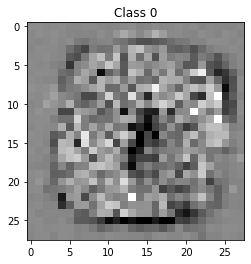

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


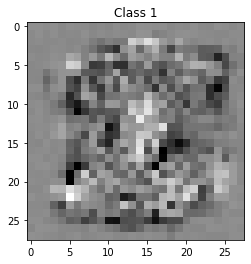

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


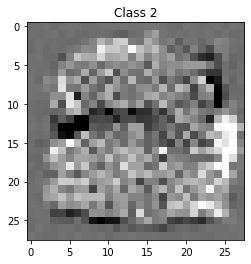

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


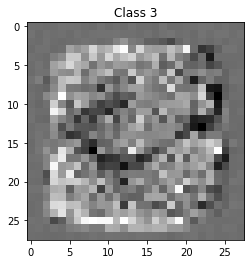

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


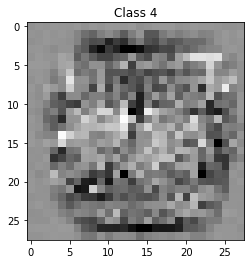

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


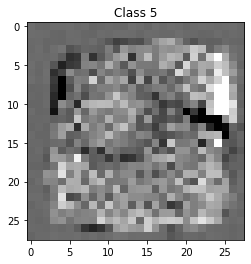

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


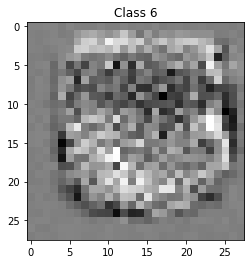

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


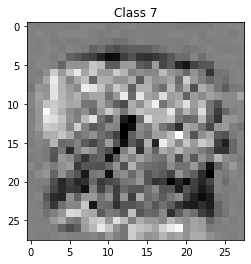

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


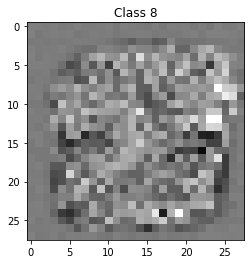

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


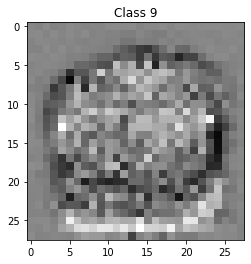

In [27]:
for parameter in network.parameters():
    for i in range(10):
        temp = torchvision.utils.make_grid(parameter[i].resize(28, 28))
        
        temp = temp / 2 + 0.5  # un-normalize
        temp_np = temp.numpy()
        
        plt.figure()
        plt.title("Class " + str(i))
        plt.imshow(np.transpose(temp_np, (1, 2, 0)))
        plt.show()
    
    break # we only need the first model parameter (weights)

In [1]:
limited_net = Net(num_inputs, num_outputs)
limited_optimizer = optim.SGD(network.parameters(), lr=lr)
# train only on 50 examples

def limited_train(epoch, train_loader):
    limited_net.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        
        if batch_idx >= 50:
            break
        
        data, target = Variable(data), Variable(target)
        limited_optimizer.zero_grad()
        output = limited_net(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        limited_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def limited_test(test_loader):
    limited_net.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = limited_net(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

NameError: name 'Net' is not defined

In [32]:
# we shall use the same options

for i in range(1, epochs+1):
    limited_train(i, mnist_train_loader)

limited_test(mnist_test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.291175
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.265909
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.382911
Train Epoch: 4 [0/60000 (0%)]	Loss: 2.325135
Train Epoch: 5 [0/60000 (0%)]	Loss: 2.365734
Train Epoch: 6 [0/60000 (0%)]	Loss: 2.360745
Train Epoch: 7 [0/60000 (0%)]	Loss: 2.415625
Train Epoch: 8 [0/60000 (0%)]	Loss: 2.365126
Train Epoch: 9 [0/60000 (0%)]	Loss: 2.405138
Train Epoch: 10 [0/60000 (0%)]	Loss: 2.223578

Test set: Average loss: 2.3899, Accuracy: 1244/10000 (12%)



# **Answer (3):**
create needed blocks of code (and results) below

# **Answer (4):**
create needed blocks of code (and results) below

In [ ]:
dataset = 'cifar10'